Nivell 1

Realitza la connexió en Python amb el MySQL Workbench per a carregar tota la informació que tens en les taules.

Realitzaràs una visualització per a cada exercici. Comenta el que et crida l'atenció de graficar aquesta variable, justifica l'elecció del gràfic i interpreta els resultats en funció de les teves dades.

In [4]:
import mysql.connector
from mysql.connector import errorcode

try:
  cnx = mysql.connector.connect(user='root',
                                password = 'Casilda20@',
                                database='ventas')
except mysql.connector.Error as err:
  if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
    print("Something is wrong with your user name or password")
  elif err.errno == errorcode.ER_BAD_DB_ERROR:
    print("Database does not exist")
  else:
    print(err)


In [5]:
# Visualización con Seaborn
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

In [6]:
# Carga de tablas automática:
cursor = cnx.cursor()

# Obtener todas las tablas de la base de datos
cursor.execute("SHOW TABLES")
tablas = [tabla[0] for tabla in cursor.fetchall()]

# Diccionario para almacenar los DataFrames
dataframes = {}

# Leer cada tabla y cargarla en un DataFrame
for tabla in tablas:
    try:
        query = f"SELECT * FROM {tabla}"
        df = pd.read_sql(query, cnx)
        dataframes[tabla] = df
        print(f"Tabla '{tabla}' cargada con {df.shape[0]} filas y {df.shape[1]} columnas.")
    except Exception as e:
        print(f"Error al cargar la tabla '{tabla}': {e}")

print("Todas las tablas fueron procesadas correctamente.")

# Cerrar la conexión y el cursor
cursor.close()
cnx.close()


C:\Users\Antonio\AppData\Local\Temp\ipykernel_8248\678340228.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnx)


Tabla 'companies' cargada con 100 filas y 6 columnas.
Tabla 'credit_cards' cargada con 275 filas y 9 columnas.
Tabla 'credit_cards_estado' cargada con 275 filas y 4 columnas.
Tabla 'products' cargada con 100 filas y 6 columnas.
Tabla 'transactions' cargada con 587 filas y 10 columnas.
Tabla 'transactions_products' cargada con 1457 filas y 2 columnas.
Tabla 'users' cargada con 275 filas y 10 columnas.
Todas las tablas fueron procesadas correctamente.


In [7]:
# Convertir de VARCHAR a FLOAT
dataframes['products']["price"] = dataframes['products']["price"].str.replace("$", "", regex=False).astype(float)

In [8]:
# Unir las tablas con merge para tener una bbdd única de Ventas
df_credit_tot = pd.merge(dataframes['credit_cards'], dataframes['credit_cards_estado'], left_on='id', right_on='id', how='left')
df_transactions_tot = pd.merge(dataframes['transactions'], dataframes['transactions_products'], left_on='id', right_on='id', how='left')
df_transactions_prod_tot = pd.merge(df_transactions_tot, dataframes['products'], left_on='product_id', right_on='id', how='left')
df_trans_prod_credit_tot = pd.merge(df_transactions_prod_tot, df_credit_tot, left_on='card_id', right_on='id', how='left')
dataframes['users'] = dataframes['users'].rename(columns={'id': 'user_id'}) # Cambio el nombre del campo para que no se llame igual que otro campo en el merge
df_trans_prod_credit_user_tot = pd.merge(df_trans_prod_credit_tot, dataframes['users'], left_on='user_id', right_on='user_id', how='left')
df_ventas = pd.merge(df_trans_prod_credit_user_tot, dataframes['companies'], left_on='business_id', right_on='company_id', how='left')


In [9]:
df_ventas.head(1)

,id_x,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitud,...,country_x,city,postal_code,address,company_id,company_name,phone_y,email_y,country_y,website
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9185,-12.5276,...,United States,Bozeman,61871,"P.O. Box 712, 7907 Est St.",b-2362,Lorem Eu Incorporated,01 83 66 62 07,enim.gravida.sit@hotmail.net,Canada,https://baidu.com/en-ca\r


In [10]:
# Convertir de VARCHAR a DATETIME
df_ventas['birth_date'] = pd.to_datetime(df_ventas['birth_date'], format='%b %d, %Y')


- Exercici 1
Una variable numèrica.

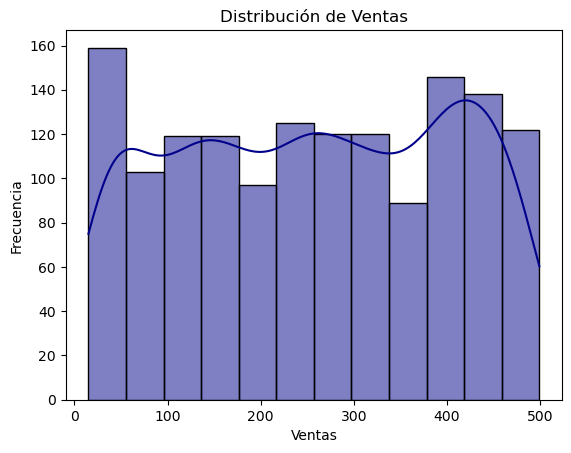

In [44]:
# Crear un histograma con KDE
sns.histplot(df_ventas['amount'], kde=True, color='darkblue')

# Título y ajustes
plt.title('Distribución de Ventas')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.show()

- Exercici 2
Dues variables numèriques.

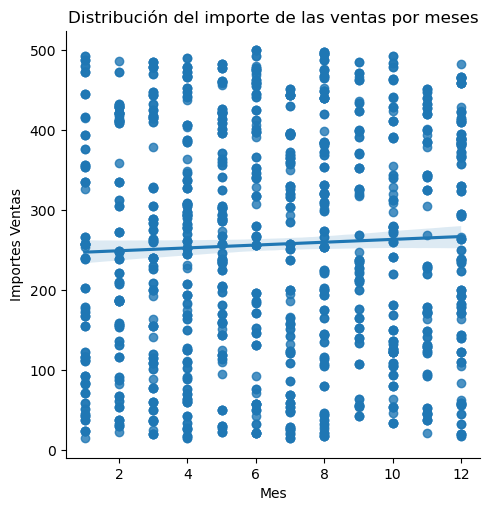

In [45]:
# Crear un gráfico con lmplot
df_ventas['month'] = df_ventas['timestamp'].dt.month
sns.lmplot(x='month', y='amount', data=df_ventas)

# Título y ajustes
plt.title('Distribución del importe de las ventas por meses')
plt.xlabel('Mes')
plt.ylabel('Importes Ventas')

# Mostrar el gráfico
plt.show()

- Exercici 3
Una variable categòrica.

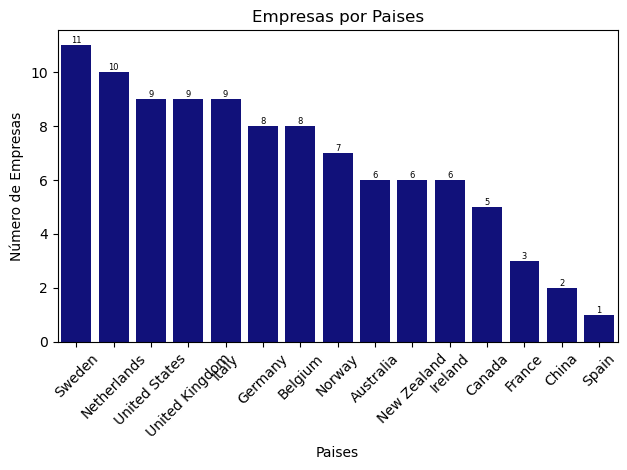

In [38]:
# Contar las empresas por país
pais_counts = dataframes['companies']['country'].value_counts()

# Crear un gráfico con countplot
ax = sns.countplot(x='country', data=dataframes['companies'], color="darkblue", order=pais_counts.index)

# Agregar etiquetas de valores sobre las barras
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=6)

# Título y ajustes
plt.title('Empresas por Paises')
plt.xlabel('Paises')
plt.ylabel('Número de Empresas')
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

- Exercici 4
Una variable categòrica i una numèrica.

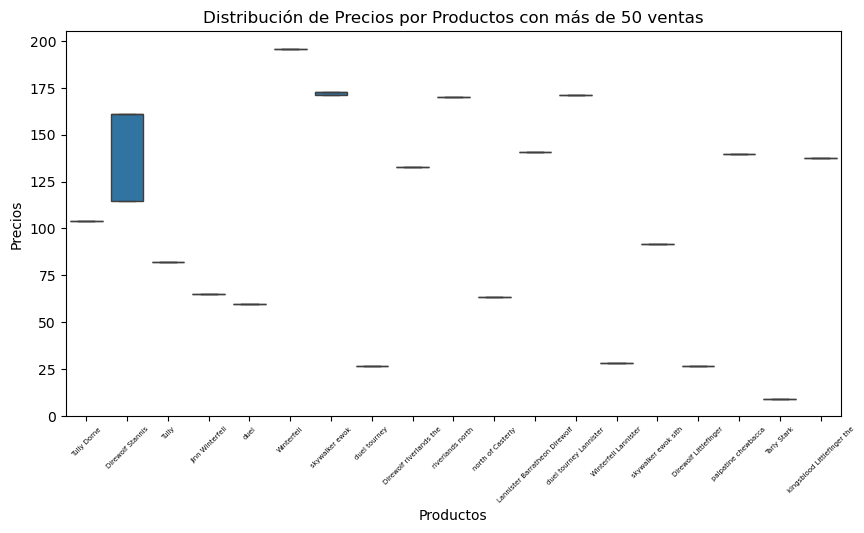

In [22]:
# Definir el tamaño del gráfico
plt.figure(figsize=(10, 5))  # Ancho=10, Alto=5

# Productos con más de 50 ventas
ventas_counts = df_ventas['product_name'].value_counts()
productos_filtrados = ventas_counts[ventas_counts > 50].index
df_filtrado = df_ventas[df_ventas['product_name'].isin(productos_filtrados)]

# Crear un boxplot
sns.boxplot(x='product_name', y='price', data=df_filtrado)

# Título y ajustes'
plt.title('Distribución de Precios por Productos con más de 50 ventas')
plt.xlabel('Productos')
plt.ylabel('Precios')
plt.xticks(rotation=45, fontsize=5)

# Mostrar el gráfico
plt.show()

- Exercici 5
Dues variables categòriques.

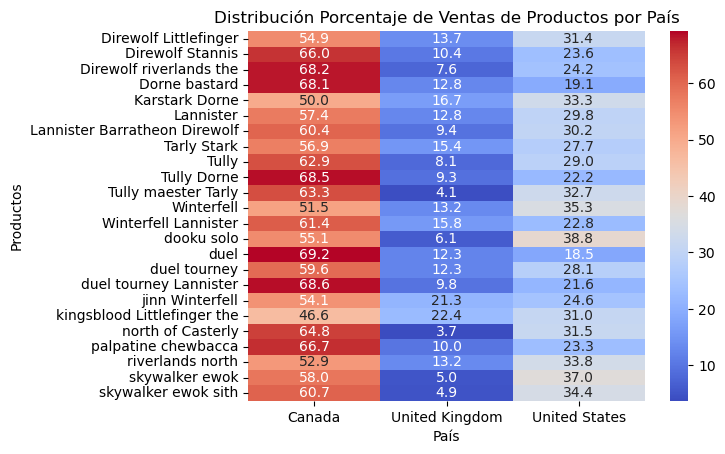

In [28]:
# Crear un heatmap
tabla = pd.crosstab(df_ventas['product_name'], df_ventas['country_x'])
tabla_porc = tabla.div(tabla.sum(axis=1), axis=0) * 100  # Calcular el % de ventas por producto
sns.heatmap(tabla_porc, annot=True, cmap='coolwarm', fmt='.1f')

# Título y ajustes
plt.title('Distribución Porcentaje de Ventas de Productos por País')
plt.xlabel('País')
plt.ylabel('Productos')

plt.show()

- Exercici 6
Tres variables.

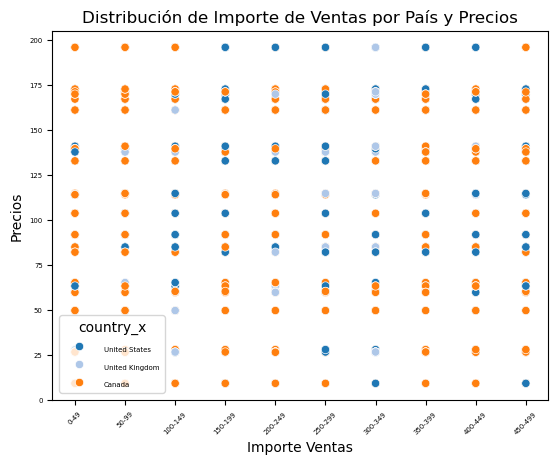

In [37]:
# Crear grupos de importes de ventas (rangos de 50)
bins = list(range(0, 1000, 50))  # Múltiplos de 50
labels = [f"{b}-{b+49}" for b in bins[:-1]]
df_ventas['ventas_group'] = pd.cut(df_ventas['amount'], bins=bins, labels=labels, right=False)

# Crear un scatterplot
ax = sns.scatterplot(data=df_ventas, x='ventas_group', y='price', hue='country_x', palette='tab20')

# Título y ajustes
plt.title('Distribución de Importe de Ventas por País y Precios')
plt.xlabel('Importe Ventas')
plt.ylabel('Precios')
plt.xticks(rotation=45, fontsize=5)
plt.yticks(fontsize=5)
plt.setp(ax.get_legend().get_texts(), fontsize=5)  # Cambia el tamaño de las etiquetas
plt.setp(ax.get_legend().get_title(), fontsize=10)  # Cambia el tamaño del título de la leyenda

plt.show()

- Exercici 7
Graficar un Pairplot.

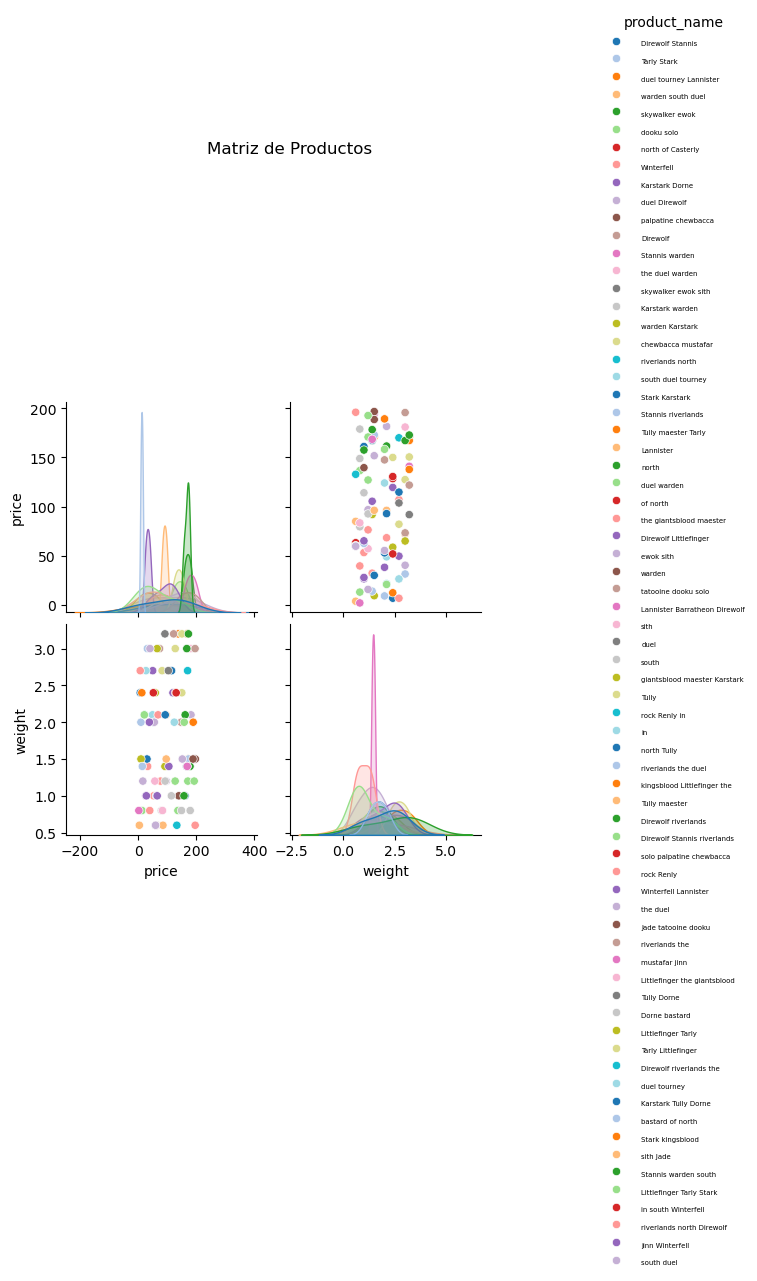

In [42]:
# Crear un pairplot
ax = sns.pairplot(data=dataframes['products'], vars=['price', 'weight'], hue="product_name", palette='tab20')

# Título y ajustes
plt.title('Matriz de Productos', fontsize=12, x=0, y=3.2)
plt.setp(ax._legend.get_texts(), fontsize=5)  # Cambia el tamaño de las etiquetas
plt.setp(ax._legend.get_title(), fontsize=10)  # Cambia el tamaño del título de la leyenda

plt.show()

Nivell 2

Exercici 1
Correlació de totes les variables numèriques.

In [43]:
# Crear una Correlations Matrix
df_ventas.select_dtypes(include = "number").corr().style.background_gradient("coolwarm")

,amount,declined,user_id,lat,longitud,product_id,id_y,price,weight,user_id_x,cvv,user_id_y
amount,1.000000,-0.027897,-0.059546,0.087361,0.035247,0.021217,0.021217,0.011335,-0.014904,-0.016648,-0.005686,-0.016648
declined,-0.027897,1.000000,0.416928,-0.014352,0.008314,0.017397,0.017397,-0.009820,-0.008512,0.328808,-0.031273,0.328808
user_id,-0.059546,0.416928,1.000000,-0.023679,0.034738,-0.008688,-0.008688,-0.006800,-0.040744,0.029395,-0.167411,0.029395
lat,0.087361,-0.014352,-0.023679,1.000000,-0.003846,-0.004800,-0.004800,-0.012937,-0.006266,-0.030251,0.019695,-0.030251
longitud,0.035247,0.008314,0.034738,-0.003846,1.000000,-0.030025,-0.030025,0.045304,-0.032691,0.021548,-0.077461,0.021548
product_id,0.021217,0.017397,-0.008688,-0.004800,-0.030025,1.000000,1.000000,-0.021742,-0.026570,0.001651,0.030515,0.001651
id_y,0.021217,0.017397,-0.008688,-0.004800,-0.030025,1.000000,1.000000,-0.021742,-0.026570,0.001651,0.030515,0.001651
price,0.011335,-0.009820,-0.006800,-0.012937,0.045304,-0.021742,-0.021742,1.000000,0.194816,0.023537,0.036106,0.023537
weight,-0.014904,-0.008512,-0.040744,-0.006266,-0.032691,-0.026570,-0.026570,0.194816,1.000000,0.011616,-0.004407,0.011616
user_id_x,-0.016648,0.328808,0.029395,-0.030251,0.021548,0.001651,0.001651,0.023537,0.011616,1.000000,0.098209,1.000000


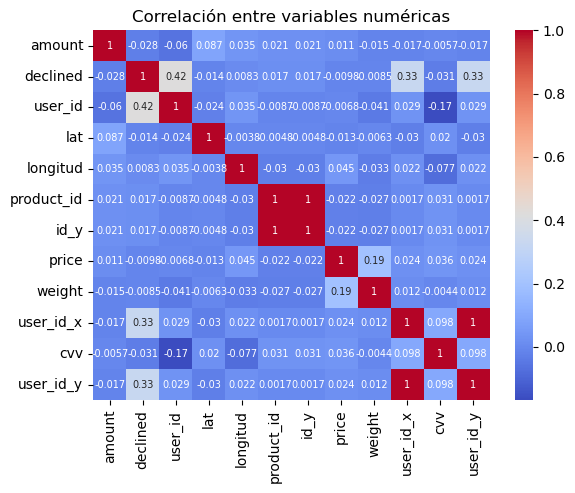

In [44]:
# Crear un gráfico con la Correlations Matrix
sns.heatmap(
    df_ventas.select_dtypes(include="number").corr(), 
    annot=True, 
    cmap="coolwarm", 
    annot_kws={"size": 7}  # Cambiar el tamaño de la fuente
)

# Título y ajustes
plt.title('Correlación entre variables numéricas')

plt.show()

Exercici 2
Implementa un jointplot.

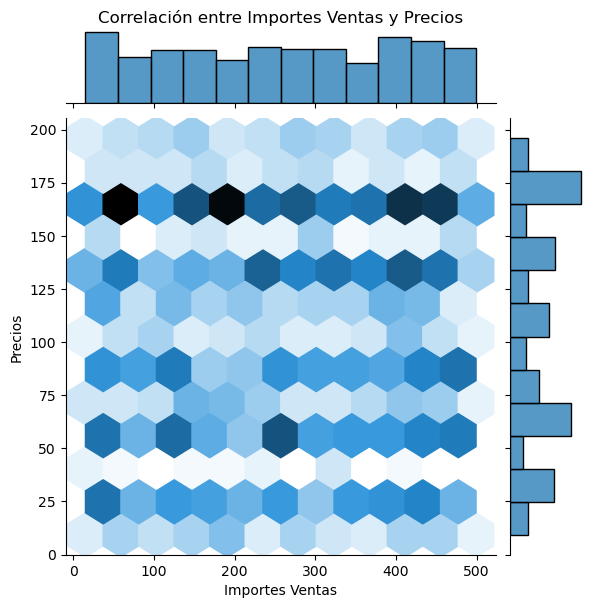

In [45]:
# Crear el gráfico JointPlot
sns.jointplot(x='amount', y='price', data=df_ventas, kind="hex", palette="tab20")

# Título y ajustes
plt.title('Correlación entre Importes Ventas y Precios', y=1.2)
plt.xlabel('Importes Ventas')
plt.ylabel('Precios')

plt.show()

Nivell 3

Exercici 1
Implementa un violinplot combinat amb un altre tipus de gràfic.

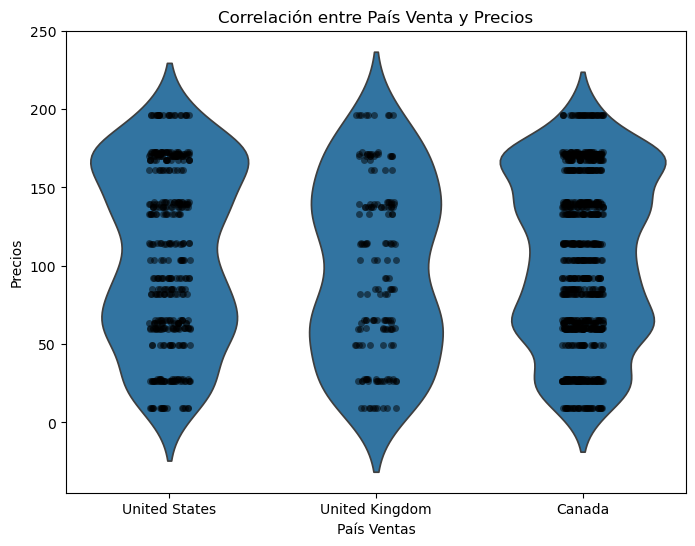

In [46]:
# Crear un gráfico ViolinPlot combinado con un Stripplot
plt.figure(figsize=(8, 6))
sns.violinplot(x='country_x', y='price', data=df_ventas, inner=None)
sns.stripplot(x='country_x', y='price', data=df_ventas, color="black", jitter=True, alpha=0.5)

# Título y ajustes
plt.title('Correlación entre País Venta y Precios', y=1)
plt.xlabel('País Ventas')
plt.ylabel('Precios')

plt.show()

Exercici 2
Genera un FacetGrid per a visualitzar múltiples aspectes de les dades simultàniament.

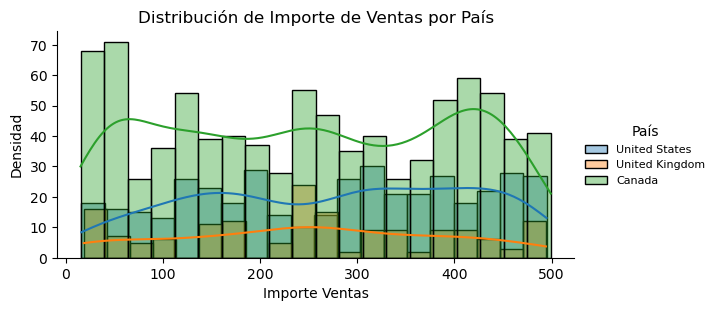

In [47]:
# Crear FacetGrid con todos los datos en una sola faceta
g = sns.FacetGrid(df_ventas, hue="country_x", aspect=2)

# Graficar las distribuciones de importe ventas por país
g.map(sns.histplot, "amount", bins=20, alpha=0.4, kde=True)

# Ajustes de leyenda y etiquetas
g.add_legend(title="País", fontsize=8)
plt.xlabel("Importe Ventas")
plt.ylabel("Densidad")
plt.title("Distribución de Importe de Ventas por País")
plt.show()